##**SI 370 Final Project - Customer Personality Analysis**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Authors: Ashley Anderson, Anthony Ho, Nina Yang, Tiara Amadia, Jason Liang

November 23, 2022

## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from scipy import stats

## Overview of Data



In [ ]:
marketing_data = pd.read_csv("marketing_campaign.csv", sep = "\t")
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
marketing_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Formatting Data


In [ ]:
marketing_data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [ ]:
marketing_data['Income'].mean()

52247.25135379061

In [ ]:
marketing_data['Income'] = marketing_data['Income'].fillna(52247.25135379061)

In [ ]:
marketing_data['Age'] = 2022 - marketing_data["Year_Birth"]

In [ ]:
marketing_data['MntTotal'] = marketing_data["MntWines"] + marketing_data["MntFruits"] + marketing_data["MntMeatProducts"] + \
                             marketing_data["MntFishProducts"] + marketing_data["MntSweetProducts"] + marketing_data["MntGoldProds"]

In [ ]:
marketing_data['NumTotalPurchases'] = marketing_data["NumWebPurchases"] + marketing_data["NumCatalogPurchases"] + marketing_data["NumStorePurchases"]

In [ ]:
marketing_data['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [ ]:
pd.to_datetime(marketing_data['Dt_Customer'])

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [ ]:
marketing_data['year_joined'] = pd.DatetimeIndex(marketing_data['Dt_Customer']).year

In [ ]:
marketing_data['years_of_loyalty'] = 2022 - marketing_data["year_joined"]

In [ ]:
marketing_data.drop(['ID', 'Dt_Customer', 'year_joined'], axis=1, inplace=True)
marketing_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,MntTotal,NumTotalPurchases,years_of_loyalty
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,1,65,1617,22,10
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,68,27,4,8
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,57,776,20,9
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,38,53,6,8
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,41,422,14,8


In [ ]:
marketing_data['NumTotalPurchases'].describe()

count    2240.000000
mean       12.537054
std         7.205741
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: NumTotalPurchases, dtype: float64

In [ ]:
marketing_data['MntTotal'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: MntTotal, dtype: float64

In [ ]:
marketing_data['high_value_consumer'] = np.where(marketing_data['MntTotal'] > 1000, 1, 0)
marketing_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,MntTotal,NumTotalPurchases,years_of_loyalty,high_value_consumer
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,1,65,1617,22,10,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,68,27,4,8,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,57,776,20,9,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,38,53,6,8,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,41,422,14,8,0


In [ ]:
q = marketing_data["Income"].quantile(1)
marketing_data = marketing_data[marketing_data["Income"] < q]

In [ ]:
marketing_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,MntTotal,NumTotalPurchases,years_of_loyalty,high_value_consumer
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,1,65,1617,22,10,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,68,27,4,8,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,57,776,20,9,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,38,53,6,8,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,41,422,14,8,0


## Exploratory Data Analysis


<ipython-input-114-bd8cee7e7e6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_data['Education'] = marketing_data['Education'].replace('2n Cycle','Master')


Text(0.5, 1.0, 'Consumers by Education Level')

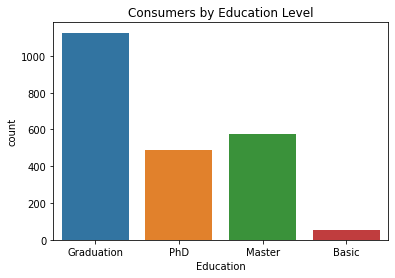

In [ ]:
marketing_data['Education'] = marketing_data['Education'].replace('2n Cycle','Master')
edu = sns.countplot(x=marketing_data["Education"])
edu.set_title("Consumers by Education Level")

Text(0.5, 1.0, 'Distribtion of Income of Consumers')

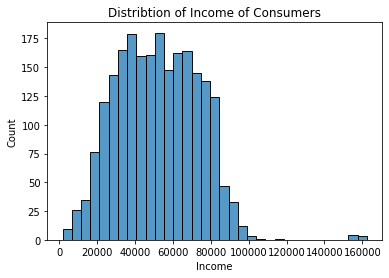

In [ ]:
income_graph = sns.histplot(data=marketing_data['Income'])
income_graph.set_title('Distribtion of Income of Consumers')

Text(0.5, 1.0, 'Distribition of Age of Consumers')

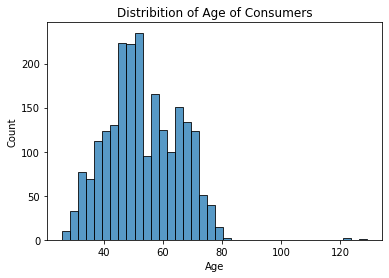

In [ ]:
age_graph = sns.histplot(data=marketing_data['Age'])
age_graph.set_title('Distribition of Age of Consumers')

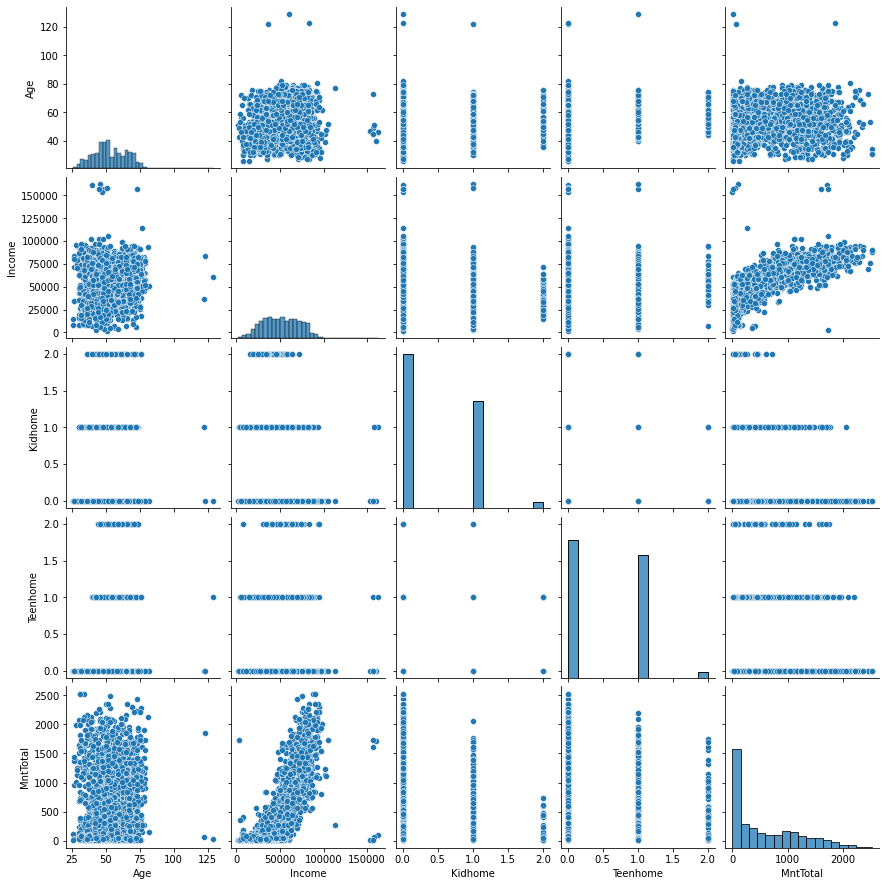

In [ ]:
explanatory_variables = marketing_data[['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome','MntTotal']]
pairplot = sns.pairplot(explanatory_variables)

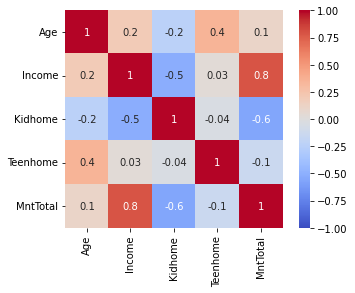

In [ ]:
sns.heatmap(explanatory_variables.corr(),cmap="coolwarm",annot=True,fmt="0.1g",vmin=-1,vmax=1,square=True)


In [ ]:
income_without_outliers = marketing_data
income_without_outliers['Income_Bracket'] = pd.cut(income_without_outliers['Income'], 5)

Text(0.5, 1.0, 'Average Spending Amount vs Income')

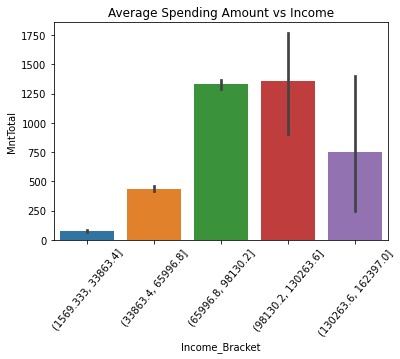

In [ ]:
income_vs_amount_spent = sns.barplot(data=income_without_outliers, x='Income_Bracket', y='MntTotal')
income_vs_amount_spent.tick_params(axis='x', rotation=50)
income_vs_amount_spent.set_title('Average Spending Amount vs Income')

In [ ]:
amount_spent_with_income = income_without_outliers[['Income_Bracket', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]


In [ ]:
method = marketing_data[['Income_Bracket','NumWebPurchases', 'NumCa']]

## Machine Learning


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
y = marketing_data['high_value_consumer']
X = marketing_data.drop(['high_value_consumer'],axis=1)

num_attributes = list(X.select_dtypes(include=[np.number]))
cat_attributes = list(X.select_dtypes(exclude=[np.number]))

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attributes),
    ("cat", OneHotEncoder(), cat_attributes),
])

X = full_pipeline.fit_transform(X)

In [ ]:
X

array([[-0.98492226,  0.28801346, -0.82476876, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23528074, -0.2629581 ,  1.03303531, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31729965,  0.91751505, -0.82476876, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.01794557,  0.23396274, -0.82476876, ...,  0.        ,
         0.        ,  0.        ],
       [-1.06837508,  0.80689095, -0.82476876, ...,  1.        ,
         0.        ,  0.        ],
       [-1.23528074,  0.04186549,  1.03303531, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred, squared=False)

0.20116062104122695

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    ]

In [ ]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # evaluate predictions
    accuracy = clf.score(X_test, y_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("%s Accuracy: %.2f%%" % (name,accuracy * 100.0))
    print("%s RMSE: %s" % (name,rmse))

Nearest Neighbors Accuracy: 93.53%
Nearest Neighbors RMSE: 0.2544251222995537
Linear SVM Accuracy: 98.21%
Linear SVM RMSE: 0.1336306209562122
RBF SVM Accuracy: 79.69%
RBF SVM RMSE: 0.45069390943299864


/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Process Accuracy: 99.55%
Gaussian Process RMSE: 0.0668153104781061
Decision Tree Accuracy: 100.00%
Decision Tree RMSE: 0.0
Random Forest Accuracy: 94.20%
Random Forest RMSE: 0.24090602791485788
Neural Net Accuracy: 98.44%
Neural Net RMSE: 0.125
AdaBoost Accuracy: 100.00%
AdaBoost RMSE: 0.0
Naive Bayes Accuracy: 87.72%
Naive Bayes RMSE: 0.35038244411336755


## PCA

In [ ]:
from sklearn.preprocessing import scale
pca_df = marketing_data.select_dtypes([np.number]).set_index('high_value_consumer')
marketing_X = pca_df.values
marketing_y = pca_df.index

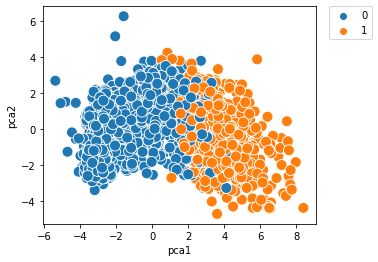

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(marketing_X))
X_pca_labelled = pd.concat([pd.DataFrame({'who':marketing_y}),pd.DataFrame(X_pca,columns=['pca1','pca2'])],axis=1)

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca1', y='pca2', hue='who', data=X_pca_labelled, ax=ax,s=120)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

## KMeans

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [ ]:
pipe0 = Pipeline([
    ('fillna',SimpleImputer(strategy='constant',fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=2,random_state=100)),
])

In [ ]:
pipe1 = Pipeline([
    ('preprocessing',pipe0),
    ('kmeans', KMeans(n_clusters=2,init='k-means++',random_state=100)),
])

In [ ]:
kmeans_df = marketing_data.select_dtypes([np.number]).drop(columns = ['high_value_consumer'])
kmeans_X = kmeans_df.values
whatever = pipe1.fit_predict(kmeans_X)
Xformed = pipe0.fit_transform(kmeans_X)

For n_clusters = 2 The average silhouette_score is : 0.5298815348398656
For n_clusters = 3 The average silhouette_score is : 0.4710618698191774
For n_clusters = 4 The average silhouette_score is : 0.4197049856416666
For n_clusters = 5 The average silhouette_score is : 0.393383273574781
For n_clusters = 6 The average silhouette_score is : 0.40672837798631145
For n_clusters = 7 The average silhouette_score is : 0.3978538434482857
For n_clusters = 8 The average silhouette_score is : 0.4046625657172123
For n_clusters = 9 The average silhouette_score is : 0.40764400378857313
For n_clusters = 10 The average silhouette_score is : 0.3541387176225091
For n_clusters = 11 The average silhouette_score is : 0.3468740869965855
For n_clusters = 12 The average silhouette_score is : 0.35506628495296677
For n_clusters = 13 The average silhouette_score is : 0.3571638911297209
For n_clusters = 14 The average silhouette_score is : 0.35615044034322013
For n_clusters = 15 The average silhouette_score is : 0.

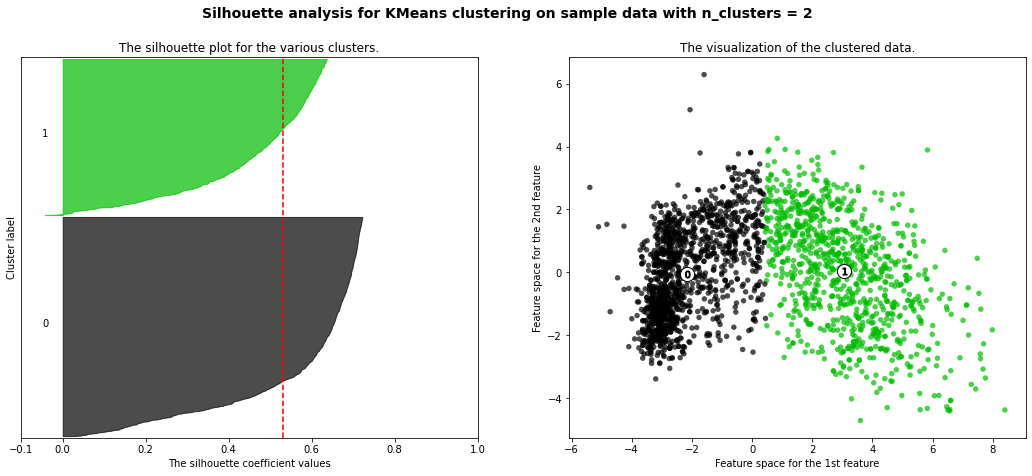

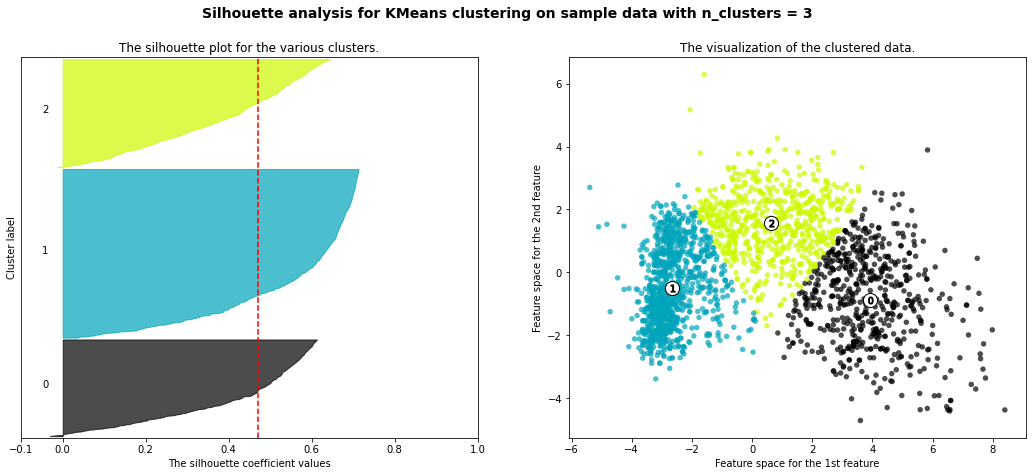

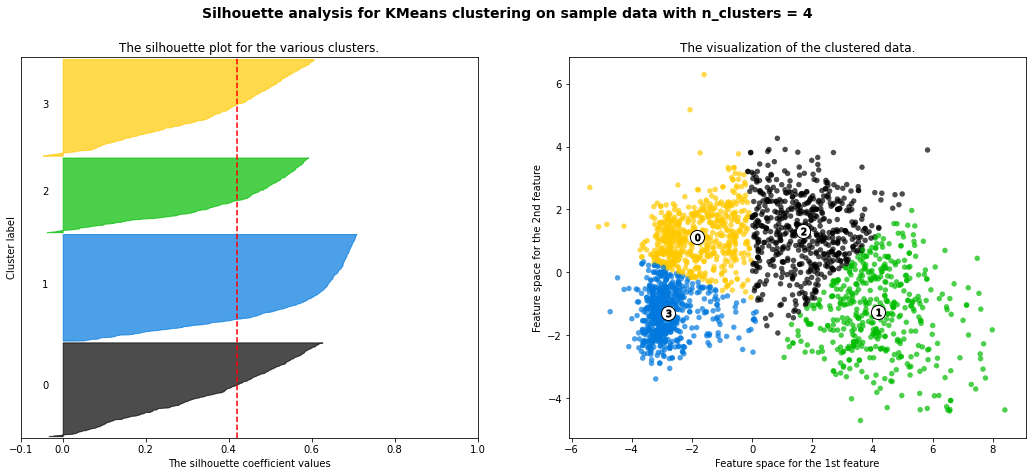

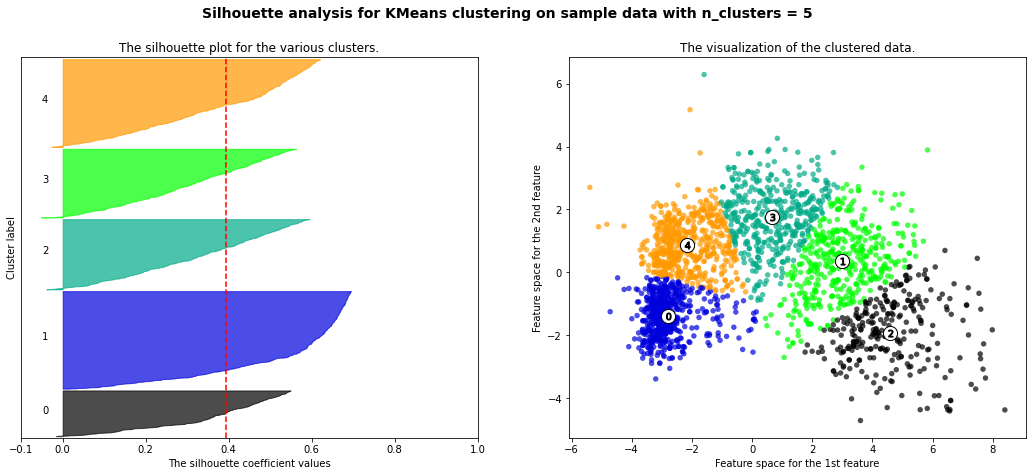

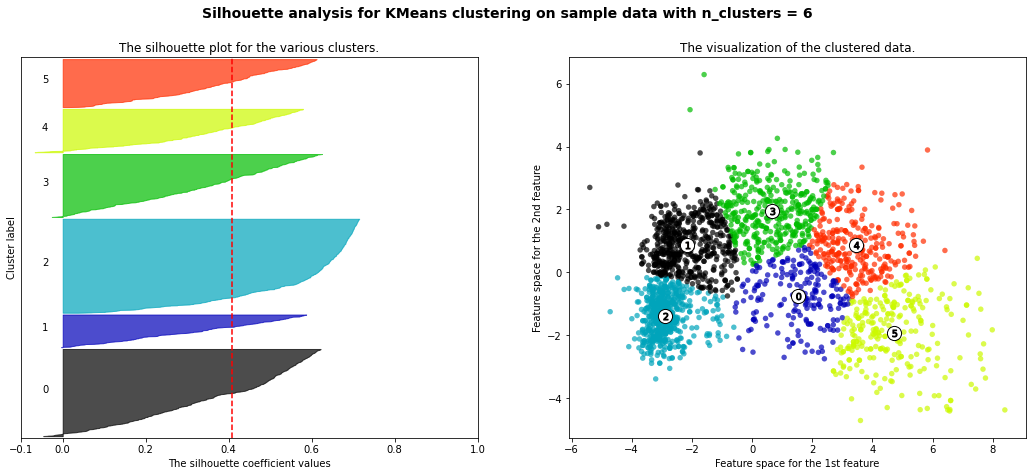

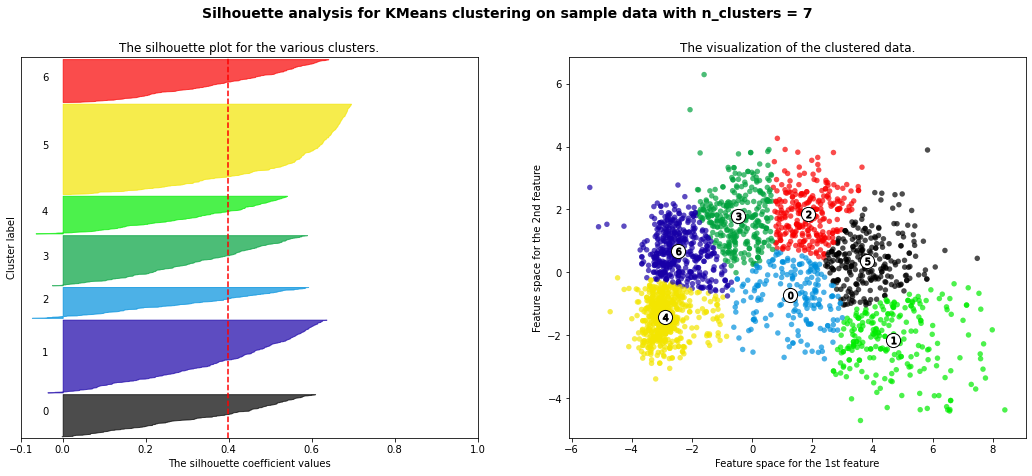

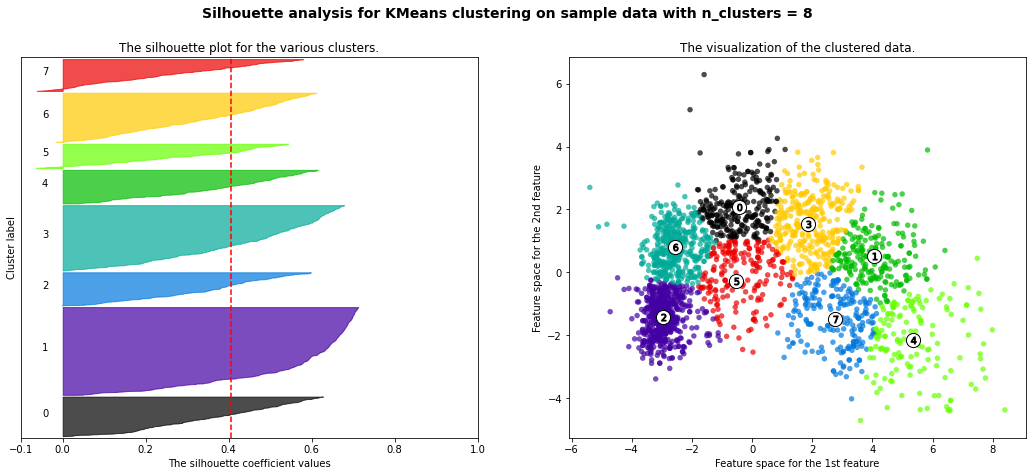

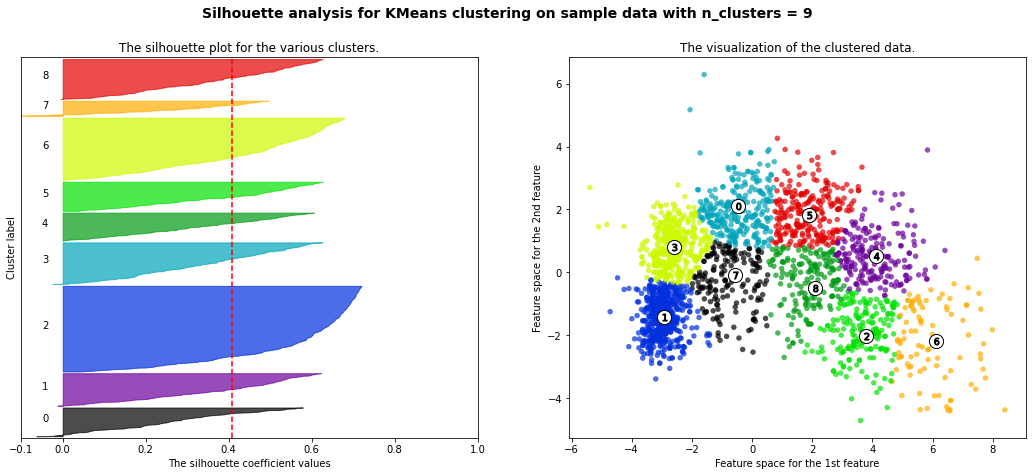

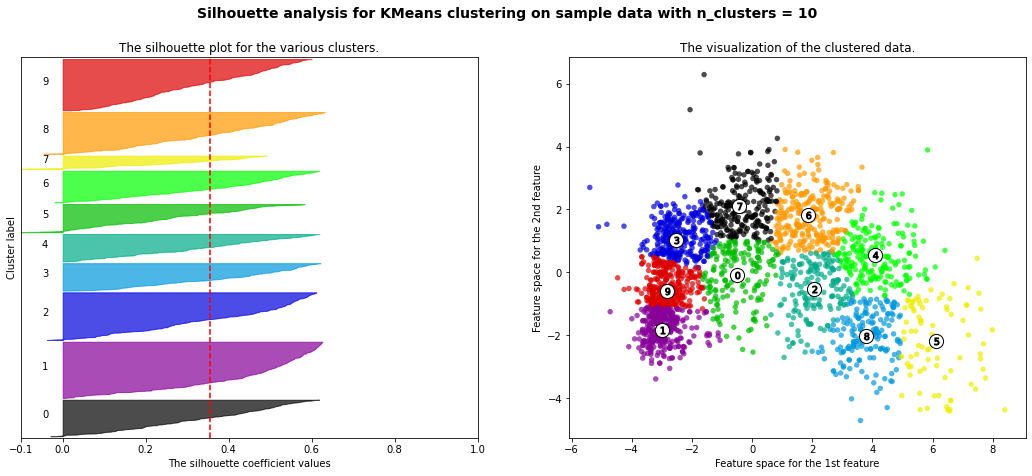

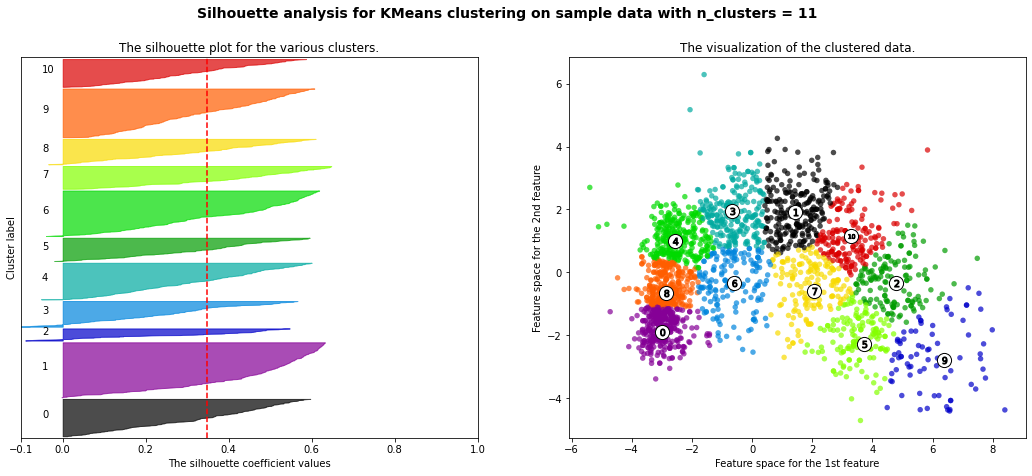

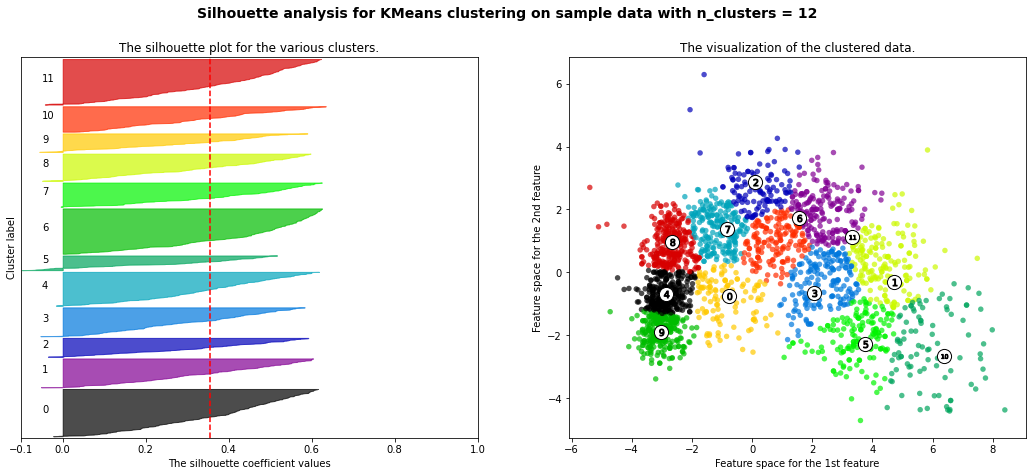

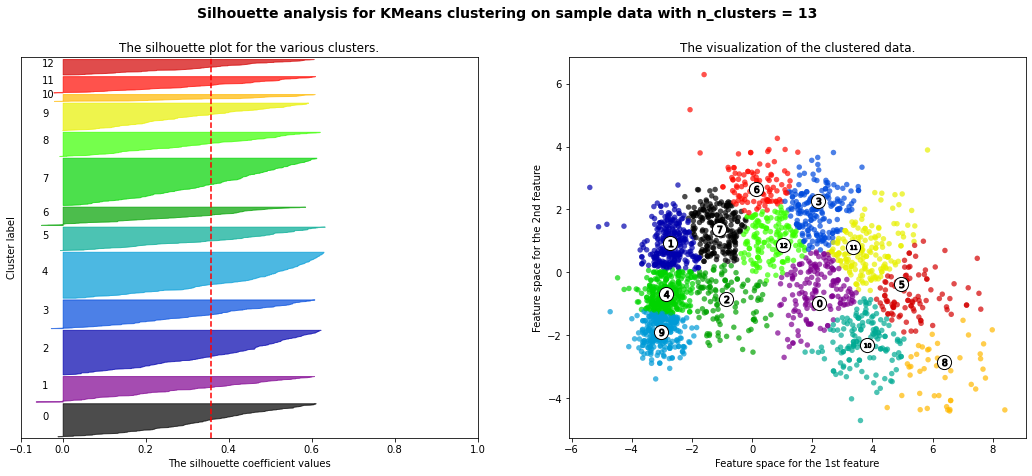

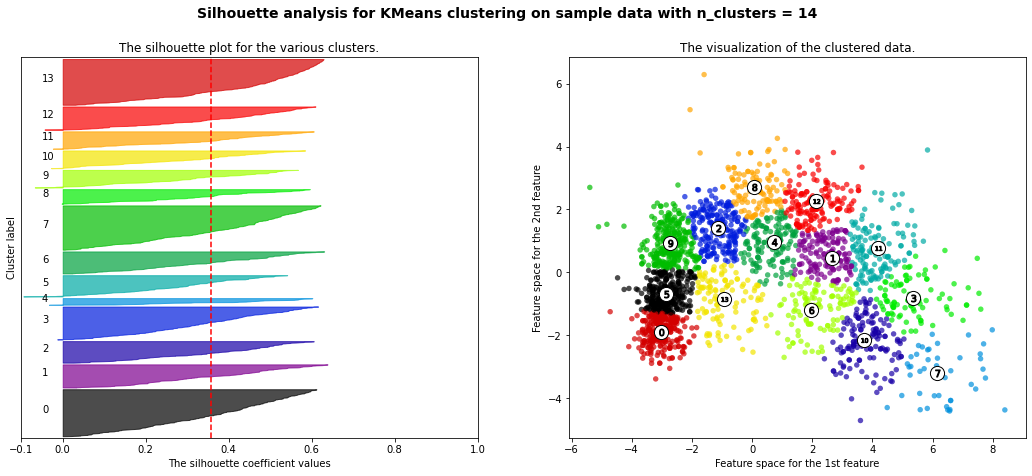

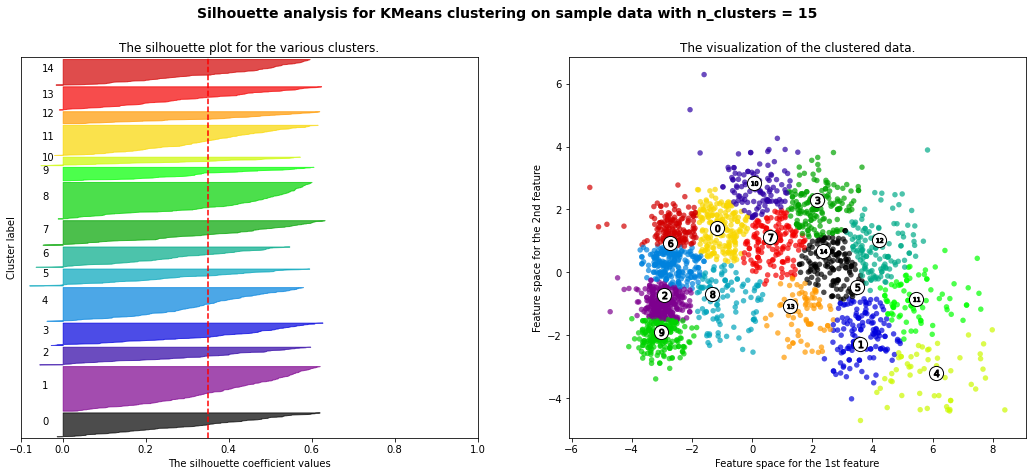

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
import numpy as np


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
label_points = False
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xformed) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    #cluster_labels = clusterer.fit_predict(Xformed)

    pipe1.named_steps.kmeans.set_params(n_clusters=n_clusters,random_state=42)
    clusterer = pipe1.named_steps.kmeans
    cluster_labels = pipe1.fit_predict(kmeans_X)
    cluster_labels = KMeans(n_clusters=n_clusters, random_state=100).fit_predict(Xformed)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xformed[:, 0], Xformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    if label_points:
        for i,v in enumerate(Xformed):
            ax2.text(v[0],v[1],y.iloc[i][0],alpha=0.4)


    # Labeling the clusters
    centers = clusterer.cluster_centers_
    #print(centers)
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.savefig('silhouette%02d.pdf' % n_clusters)
plt.show()